In [58]:
%matplotlib inline
from sklearn import datasets
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns
import random as rnd

iris = datasets.load_iris()

df = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])  
# np.c_ : Stack 1-D arrays as columns into a 2-D array.


df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [59]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


C:\Users\ankush\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ankush\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ankush\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\ankush\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


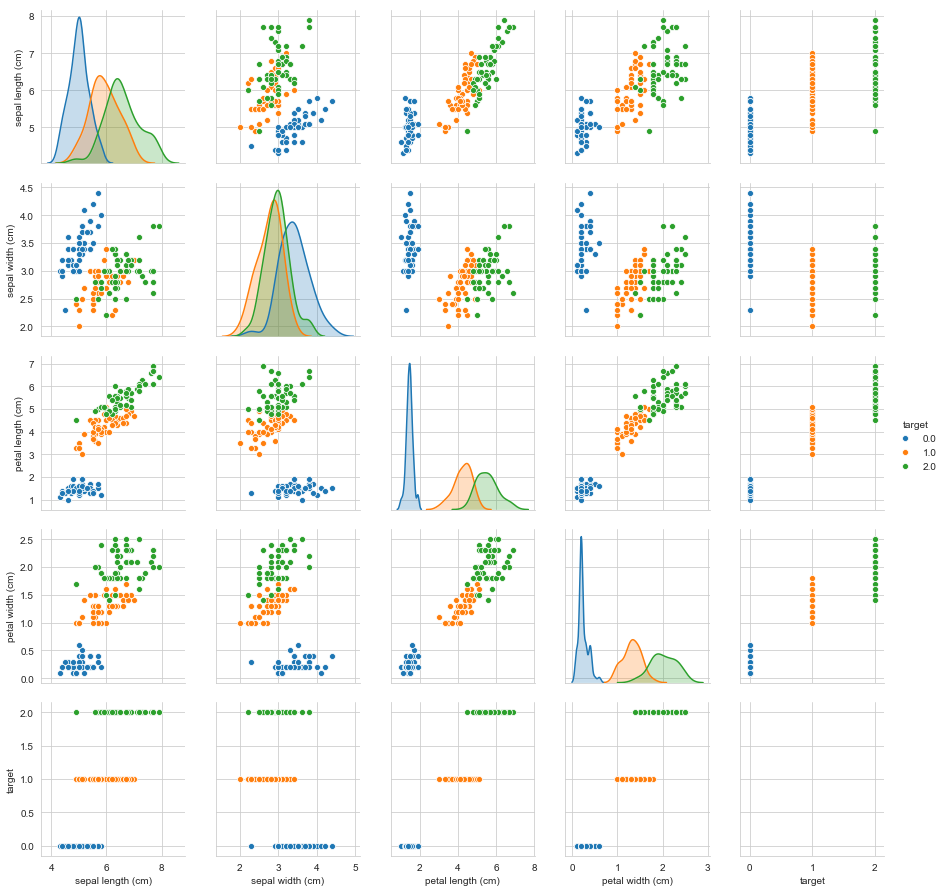

In [60]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='target')

In [80]:
X = iris.data[0:150, :]
X.shape

(150, 4)

In [81]:
Y = iris.target[0:150]
Y.shape

(150,)

In [82]:
setosa_index = rnd.randrange(0, 49)
test_setosa = [iris.data[setosa_index, :]]
X = np.delete(X, setosa_index, 0)
Y = np.delete(Y, setosa_index, 0)
test_setosa, iris.target_names[iris.target[setosa_index]], X.shape, Y.shape

([array([5.2, 3.5, 1.5, 0.2])], 'setosa', (149, 4), (149,))

In [83]:
virginica_index = rnd.randrange(100, 149)
test_virginica = [iris.data[virginica_index, :]]
X = np.delete(X, virginica_index, 0)
Y = np.delete(Y, virginica_index, 0)
test_virginica, iris.target_names[iris.target[virginica_index]], X.shape, Y.shape

([array([6.5, 3.2, 5.1, 2. ])], 'virginica', (148, 4), (148,))

In [84]:
versicolor_index = rnd.randrange(50, 99)
test_versicolor = [iris.data[versicolor_index, :]]

X = np.delete(X, versicolor_index, 0)
Y = np.delete(Y, versicolor_index, 0)
test_versicolor, iris.target_names[iris.target[versicolor_index]], X.shape, Y.shape

([array([6.3, 2.5, 4.9, 1.5])], 'versicolor', (147, 4), (147,))

In [85]:
# Decision Tree Classifier Model
model_tree = tree.DecisionTreeClassifier()

# Training the model
model_tree.fit(X, Y)

pred_tree_setosa = model_tree.predict(test_setosa)
print('Decision Tree predicts {} for test_setosa'.format(iris.target_names[pred_tree_setosa]))

Decision Tree predicts ['setosa'] for test_setosa


In [86]:
pred_tree_virginica = model_tree.predict(test_virginica)
print('Decision Tree predicts {} for test_virginica'.format(iris.target_names[pred_tree_virginica]))

Decision Tree predicts ['virginica'] for test_virginica


In [87]:
pred_tree_versicolor = model_tree.predict(test_versicolor)
print('Decision Tree predicts {} for test_versicolor'.format(iris.target_names[pred_tree_versicolor]))

Decision Tree predicts ['versicolor'] for test_versicolor


In [88]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [89]:
# select features
y = df['target']
x = df[['petal length (cm)', 'petal width (cm)']]
# split data randomly into 70% training and 30% test
from sklearn import tree, metrics, model_selection, preprocessing
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3, random_state=0)

In [90]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0) # GINI, GINIGain
dtree.fit(x_train, y_train)
# use the model to make predictions with the test data
y_pred = dtree.predict(x_test)
#dtree
y_pred, y_test

(array([2., 1., 0., 2., 0., 2., 0., 1., 1., 1., 2., 1., 1., 1., 1., 0., 1.,
        1., 0., 0., 2., 1., 0., 0., 2., 0., 0., 1., 1., 0., 2., 1., 0., 2.,
        2., 1., 0., 2., 1., 1., 2., 0., 2., 0., 0.]), 114    2.0
 62     1.0
 33     0.0
 107    2.0
 7      0.0
 100    2.0
 40     0.0
 86     1.0
 76     1.0
 71     1.0
 134    2.0
 51     1.0
 73     1.0
 54     1.0
 63     1.0
 37     0.0
 78     1.0
 90     1.0
 45     0.0
 16     0.0
 121    2.0
 66     1.0
 24     0.0
 8      0.0
 126    2.0
 22     0.0
 44     0.0
 97     1.0
 93     1.0
 26     0.0
 137    2.0
 84     1.0
 27     0.0
 127    2.0
 132    2.0
 59     1.0
 18     0.0
 83     1.0
 61     1.0
 92     1.0
 112    2.0
 2      0.0
 141    2.0
 43     0.0
 10     0.0
 Name: target, dtype: float64)

# Evaluate the model's performance

In [91]:
# how did our mmodel performance?
count_misclassified = (y_test != y_pred).sum()
print("misclassified samples: {}".format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

misclassified samples: 1


0.9777777777777777

In [92]:
# import sys
# !{sys.executable} -m pip install pydotplus

In [93]:
# import sys
# !{sys.executable} -m pip install --upgrade pip

In [94]:
# import sys
# !{sys.executable} -m pip install graphviz

In [95]:
# import sys
# !{sys.executable} -m conda install dot

In [96]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'     
# this is necessary otherwise will get 'error: InvocationException: GraphViz's executables not found' in below code

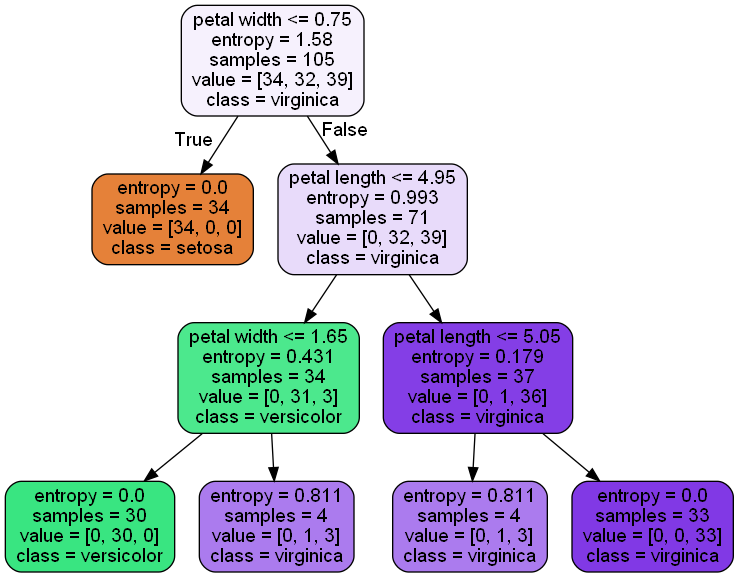

In [97]:
from IPython.display import Image, display
import numpy as np, pandas as pd, matplotlib.pyplot as plt, pydotplus
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,  
                               feature_names=['petal length', 'petal width'],
                               class_names=['setosa', 'versicolor', 'virginica'])
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))